# The numpy.random package
### Conor McCaffrey

***

In [4]:
import numpy as np
rng = np.random.default_rng()

In [5]:
rng.integers(2, size=10) # up to but not including 2. Size is the amount of elements returned

array([0, 1, 1, 0, 1, 1, 0, 1, 0, 1], dtype=int64)

In [22]:
f =  rng.integers(5, size=(2, 4)) # generated multi-dimensional array (outer square brackets). The '5' perhaps refers to up to but not including 5 like as above 'Size' structured as the following: 2 is the number if arrays returned with 4 being the number of elements in each.
print('This is f: \n' , f)   # reference for newline character (https://stackoverflow.com/questions/11497376/how-do-i-specify-new-lines-on-python-when-writing-on-files)

# Verifying size attribute by changing value of first parameter to 5 to investigate if 5 arrays print. Assinging as variable 'g' to allow printing along with above function to allow comparison
g =  rng.integers(5, size=(5, 4))
print('This is g: \n', g)

# Verifying size attribute by changing value of second parameter to 10 to investigate if 10 elements are in each list. Assinging as variable 'h' to allow comparison
h =  rng.integers(5, size=(5, 10))
print('This is h: \n', h)


# Specifying multiple parameters
i =  rng.integers(5, size=(5, 4,3,4))
print('This is i: \n', i)


# Wrapping empty function in try except block to investigate effect (REFERENCE https://docs.python.org/3/tutorial/errors.html)

try:
    rng.integers()
except BaseException as err:
    print('This has caused an error')
else:
    print('Function still worked')

This is f: 
 [[2 4 3 4]
 [4 2 3 2]]
This is g: 
 [[0 1 1 0]
 [3 1 0 0]
 [3 3 0 4]
 [4 3 4 4]
 [3 0 3 1]]
This is h: 
 [[3 0 3 4 0 1 1 1 2 3]
 [1 0 1 4 3 4 0 1 1 3]
 [4 0 2 1 2 4 2 4 2 2]
 [3 1 3 4 2 1 1 4 4 1]
 [3 0 2 0 4 1 3 2 0 0]]
This is i: 
 [[[[4 2 2 0]
   [2 0 0 1]
   [0 0 1 0]]

  [[4 4 1 4]
   [3 1 0 0]
   [0 1 1 4]]

  [[2 0 4 0]
   [3 2 3 1]
   [1 1 1 2]]

  [[1 1 3 2]
   [4 2 4 3]
   [0 4 2 1]]]


 [[[2 3 1 1]
   [0 0 2 0]
   [1 2 0 1]]

  [[3 2 2 1]
   [1 0 4 3]
   [1 2 0 0]]

  [[0 2 2 0]
   [2 0 2 2]
   [0 2 0 1]]

  [[3 2 0 3]
   [1 2 1 3]
   [2 4 1 3]]]


 [[[3 4 0 1]
   [0 2 2 2]
   [1 2 1 0]]

  [[2 0 3 3]
   [4 0 3 4]
   [1 3 3 2]]

  [[1 4 1 0]
   [0 4 3 0]
   [2 0 3 4]]

  [[4 2 0 4]
   [4 1 2 0]
   [1 0 0 1]]]


 [[[2 4 2 3]
   [0 0 2 3]
   [3 0 4 3]]

  [[2 3 0 4]
   [0 0 0 3]
   [0 4 1 0]]

  [[1 3 2 3]
   [4 1 4 1]
   [4 3 4 0]]

  [[0 2 3 4]
   [4 1 4 0]
   [2 1 0 2]]]


 [[[4 3 4 4]
   [4 2 3 1]
   [0 0 2 4]]

  [[2 4 0 2]
   [0 2 2 1]
   [1 1 3 0]]

  [[4 4

In [24]:
x = rng.integers(100, size=10000)

(array([ 965., 1044.,  991.,  995.,  998., 1020., 1046.,  990.,  996.,
         955.]),
 array([ 0. ,  9.9, 19.8, 29.7, 39.6, 49.5, 59.4, 69.3, 79.2, 89.1, 99. ]),
 <BarContainer object of 10 artists>)

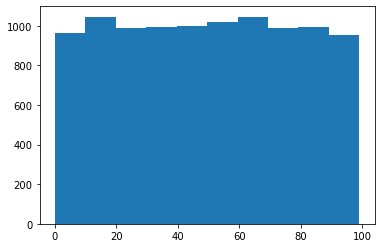

In [26]:
%matplotlib inline # magic command forcing plot to display if needed

import matplotlib.pyplot as plt # import matplotlib and plot above function

plt.hist(x)